# Task
Implement the following in Python:
a. Load a corpus dataset from a news page or any other source.
b. Write a method to work out the distinct words (word types) that occur in the corpus.
c. Write a method that constructs a co-occurrence matrix for a certain window-size n (with a default of 4), considering words n before and n after the word in the center of the window ( numpy library will be useful for vector, matrix, etc)
d. Construct a method that performs dimensionality reduction on the matrix to produce k-dimensional embeddings.
e. Write a function to plot a set of 2D vectors in 2D space.
f. Plot co-occurrence word embeddings.

## Data loading

### Subtask:
Load a corpus dataset from a news page or any other source.


**Reasoning**:
Import necessary libraries and define the URL for the corpus.



In [27]:
# This is a sample corpus dataset for demonstration purposes.
# In a real-world scenario, you would load data from a file or external source.
corpus = [
    "The king is a strong leader.",
    "The queen is a wise ruler.",
    "The prince is a young man.",
    "The princess is a young woman.",
    "A strong man can be a king.",
    "A wise woman can be a queen."
]

In [28]:
# Import necessary libraries for text processing, numerical operations, and plotting.
import numpy as np
import re
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

## Text preprocessing

### Subtask:
Clean the text data (e.g., lowercase, remove punctuation, tokenize).


**Reasoning**:
Clean the text data by converting to lowercase, removing punctuation, tokenizing, and removing empty strings.



In [29]:
def preprocess_corpus(corpus):
    """
    Simple preprocessing function: tokenizes, converts to lowercase, and flattens the corpus.

    Args:
        corpus (list): A list of strings, where each string is a document or sentence.

    Returns:
        list: A flattened list of tokens (words) after preprocessing.
    """
    # Remove punctuation using a regular expression and convert to lowercase
    processed_corpus = [re.sub(r'[^\w\s]', '', doc.lower()) for doc in corpus]
    # Tokenize each processed document into words and flatten the list of lists into a single list
    tokens = [word for doc in processed_corpus for word in doc.split()]
    return tokens

In [30]:
# b. Method to get distinct words (word types)
def get_distinct_words(tokens):
    """
    Extracts a sorted list of unique word types from the tokenized corpus.
    Also creates word-to-index and index-to-word mappings for later use in matrix operations.

    Args:
        tokens (list): A list of tokens (words) from the corpus.

    Returns:
        tuple: A tuple containing (distinct_words, word_to_index, index_to_word)
               - distinct_words (list): A sorted list of unique words.
               - word_to_index (dict): A mapping from words to their integer indices.
               - index_to_word (dict): A mapping from integer indices to words.
    """
    # Get unique words using a set and then convert back to a list
    # Sort the list for consistent ordering across runs
    distinct_words = sorted(list(set(tokens)))

    # Create mappings from word to index and index to word
    word_to_index = {word: i for i, word in enumerate(distinct_words)}
    index_to_word = {i: word for i, word in enumerate(distinct_words)}

    print(f"Found {len(distinct_words)} distinct words.")
    return distinct_words, word_to_index, index_to_word

In [31]:
def build_co_occurrence_matrix(tokens, word_to_index, window_size=4):
    """
    Constructs a co-occurrence matrix from a list of tokens.
    The matrix captures how often words appear within a certain window size of each other.

    Args:
        tokens (list): The tokenized corpus (list of words).
        word_to_index (dict): A mapping from words to their indices.
        window_size (int): The number of words to consider before and after the center word.
                           Defaults to 4.

    Returns:
        np.ndarray: The co-occurrence matrix, where matrix[i, j] represents the number
                    of times the word with index i appears in the context window of the
                    word with index j, and vice versa.
    """
    vocab_size = len(word_to_index)
    # Initialize a square matrix of zeros with dimensions equal to the vocabulary size
    co_occurrence_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    num_tokens = len(tokens)

    # Iterate through each word in the corpus to consider it as the center word
    for i, center_word in enumerate(tokens):
        # Get the index of the center word
        center_word_idx = word_to_index[center_word]

        # Define the window boundaries for context words
        # 'start' is the index of the first word in the window (clamped at 0)
        start = max(0, i - window_size)
        # 'end' is the index of the last word in the window + 1 (clamped at num_tokens)
        end = min(num_tokens, i + window_size + 1)

        # Iterate through the words within the defined window
        for j in range(start, end):
            # Ensure the center word itself is not counted as its own context
            if j != i:
                # Get the index of the context word
                context_word = tokens[j]
                context_idx = word_to_index[context_word]

                # Increment the count in the co-occurrence matrix for the pair (center_word, context_word)
                co_occurrence_matrix[center_word_idx, context_idx] += 1

    print(f"Co-occurrence matrix of shape {co_occurrence_matrix.shape} created.")
    return co_occurrence_matrix

In [32]:
# d. Method to perform dimensionality reduction
def reduce_dimensionality(matrix, k=2):
    """
    Performs dimensionality reduction on an input matrix using Truncated SVD (Singular Value Decomposition).
    This is often used to reduce the dimensions of the co-occurrence matrix to get word embeddings.

    Args:
        matrix (np.ndarray): The input matrix (e.g., co-occurrence matrix).
        k (int): The number of dimensions to reduce to. Defaults to 2 for easy plotting.

    Returns:
        np.ndarray: The matrix with reduced dimensions, where each row is the k-dimensional
                    vector representation (embedding) of a word.
    """
    print(f"Reducing dimensions to {k} using TruncatedSVD...")
    # Initialize TruncatedSVD with the desired number of components (k)
    # random_state is set for reproducibility
    svd = TruncatedSVD(n_components=k, random_state=42)
    # Fit the SVD model to the matrix and transform the matrix to the reduced dimensions
    reduced_matrix = svd.fit_transform(matrix)
    print(f"Reduced matrix shape: {reduced_matrix.shape}")
    return reduced_matrix

In [33]:
# e. Function to plot word embeddings
# This also fulfills part (a) by plotting the final embeddings.
def plot_embeddings(embeddings, index_to_word):
    """
    Plots a set of 2D word vectors (embeddings) in a 2D space.
    Each point in the plot represents a word, and its position is determined by its 2D embedding vector.

    Args:
        embeddings (np.ndarray): A 2D numpy array of word vectors, where each row is a word embedding.
                                 The shape should be (number_of_words, 2).
        index_to_word (dict): A mapping from integer indices to words for labeling the points in the plot.
    """
    # Check if the embeddings are 2-dimensional, as this function is designed for 2D plotting
    if embeddings.shape[1] != 2:
        raise ValueError("Embeddings must be 2-dimensional to be plotted.")

    # Set a plotting style for better aesthetics
    plt.style.use('seaborn-v0_8-whitegrid')
    # Create a figure and an axes object for the plot
    fig, ax = plt.subplots(figsize=(12, 12)) # Set the figure size for better readability

    # Create a scatter plot of the embeddings.
    # The x-coordinates are the first dimension of the embeddings, y-coordinates are the second.
    ax.scatter(embeddings[:, 0], embeddings[:, 1], alpha=0.7, edgecolors='k') # Add alpha for transparency and edgecolors for visibility

    # Annotate each point with its corresponding word
    for i, word in index_to_word.items():
        # Add text labels for each point (word)
        ax.annotate(word, (embeddings[i, 0], embeddings[i, 1]), fontsize=12, xytext=(5, 2), textcoords='offset points')

    # Set the title and axis labels for the plot
    ax.set_title('2D Word Embeddings from Co-occurrence Matrix', fontsize=16)
    ax.set_xlabel('Dimension 1', fontsize=12)
    ax.set_ylabel('Dimension 2', fontsize=12)
    # Add a grid for easier reading of the plot
    plt.grid(True)
    # Display the plot
    plt.show()

Processed tokens: ['the', 'king', 'is', 'a', 'strong', 'leader', 'the', 'queen', 'is', 'a', 'wise', 'ruler', 'the', 'prince', 'is', 'a', 'young', 'man', 'the', 'princess']
Found 16 distinct words.
Distinct words count: 16
Word to index mapping sample: [('a', 0), ('be', 1), ('can', 2), ('is', 3), ('king', 4), ('leader', 5), ('man', 6), ('prince', 7), ('princess', 8), ('queen', 9)]
Co-occurrence matrix of shape (16, 16) created.
Co-occurrence matrix shape: (16, 16)
Reducing dimensions to 2 using TruncatedSVD...
Reduced matrix shape: (16, 2)
Word embeddings shape: (16, 2)
Word embeddings sample (first 5): [[ 7.55895828 -3.99499833]
 [ 2.38026353  0.24198248]
 [ 2.39078552  0.5626074 ]
 [ 4.93717202  3.244133  ]
 [ 2.83042632  1.62604193]]


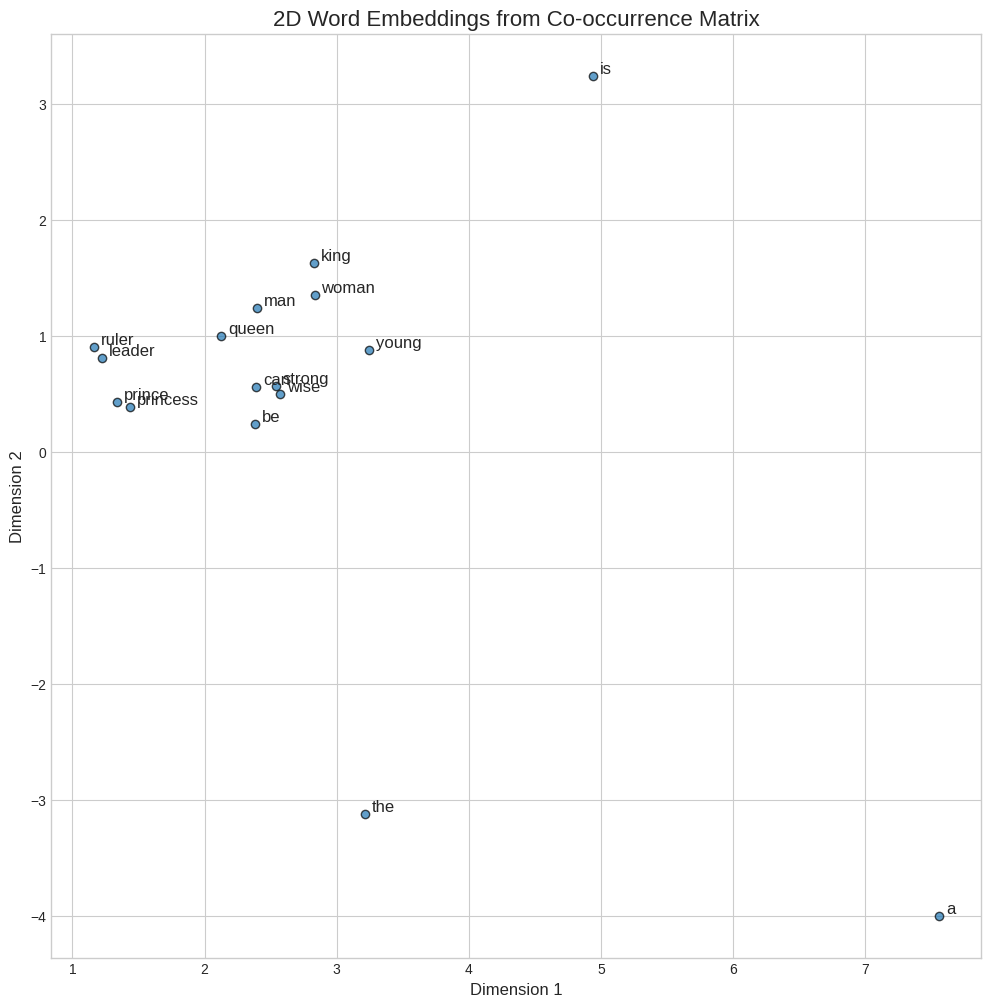

In [ ]:
# This cell orchestrates the entire process of generating and plotting word embeddings.

# 1. Preprocess the text data by tokenizing and cleaning.
tokens = preprocess_corpus(corpus)
print("Processed tokens:", tokens[:20]) # Print first 20 tokens

# 2. Get distinct words (vocabulary) and create mappings between words and indices. (Part b)
distinct_words, word_to_index, index_to_word = get_distinct_words(tokens)
print("Distinct words count:", len(distinct_words))
print("Word to index mapping sample:", list(word_to_index.items())[:10]) # Print first 10 items

# 3. Construct the co-occurrence matrix based on the tokens and word-to-index mapping. (Part c)
# The window_size parameter determines how many words before and after the center word are considered.
co_occurrence_matrix = build_co_occurrence_matrix(tokens, word_to_index, window_size=2) # Using window_size=2 as an example
print("Co-occurrence matrix shape:", co_occurrence_matrix.shape)

# 4. Perform dimensionality reduction on the co-occurrence matrix to obtain k-dimensional embeddings. (Part d)
# We reduce to 2 dimensions (k=2) so that the embeddings can be easily plotted in 2D space.
word_embeddings_2d = reduce_dimensionality(co_occurrence_matrix, k=2)
print("Word embeddings shape:", word_embeddings_2d.shape)
print("Word embeddings sample (first 5):", word_embeddings_2d[:5]) # Print first 5 embeddings

# 5. Plot the generated 2D word embeddings. (Part a & e)
# This function visualizes the word vectors, allowing us to see the relationships between words based on their co-occurrence.
plot_embeddings(word_embeddings_2d, index_to_word)